1. feature selection based on F-Value (calculate for each label columns and add together)
2. get features which maxize roc_auc_score by looping with LogReg and adding one feature at a time
3. plot results of loop


In [1]:
import re
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
data_path_raw = Path.cwd().parent / "data" / "raw"
data_path_preprocessed = Path.cwd().parent / "data" / "processed"

In [3]:
raw_df_processed_balanced = pd.read_csv(
    data_path_preprocessed / 
    "training_set_features__nominal_ordinal_WOE_Impute_Dropped_balanced_stand.csv", 
    index_col="respondent_id"
)

labels_df_balanced = pd.read_csv(
    data_path_preprocessed / 
    "training_set_labels__balanced.csv", 
    index_col="respondent_id"
)

test_df_processed = pd.read_csv(
    data_path_preprocessed / 
    "test_set_features_nominal_ordinal_WOE_Impute_Dropped_Stand.csv", 
    index_col="respondent_id"
)


all_raw_df = raw_df_processed_balanced.join(labels_df_balanced)

In [4]:
## 1 feature selection based on F-Value (calculate for each label columns and add together)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction h1n1
SelectBest = SelectKBest(score_func=f_classif, k=4)
bestfeatures_h1n1 = SelectBest.fit(raw_df_processed_balanced,labels_df_balanced['h1n1_vaccine_new'])

# summarize scores
pd.set_option("display.max_rows", 80) 
bestfeatures_h1n1_df = pd.DataFrame(bestfeatures_h1n1.scores_, index = raw_df_processed_balanced.columns.tolist())
bestfeatures_h1n1_df.columns = ['h1n1_scores']
bestfeatures_h1n1_df.sort_values(ascending = False, by = 'h1n1_scores')


# feature extraction seasonal
bestfeatures_seasonal = SelectBest.fit(raw_df_processed_balanced,labels_df_balanced['seasonal_vaccine_new'])

# summarize scores
bestfeatures_seasonal_df = pd.DataFrame(bestfeatures_seasonal.scores_, index = raw_df_processed_balanced.columns.tolist())
bestfeatures_seasonal_df.columns = ['seasonal_scores']

# combine individual scores

bestfeatutures_df = bestfeatures_h1n1_df.join(bestfeatures_seasonal_df)
bestfeatutures_df['combined_scores'] = bestfeatutures_df['h1n1_scores'] + bestfeatutures_df['seasonal_scores']
bestfeatutures_df.sort_values(ascending = False, by = 'combined_scores')


/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [29 31 46 49] are constant.
  UserWarning)
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [29 31 46 49] are constant.
  UserWarning)
/Users/johannes/opt/anaconda3/envs/py37-ds/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,h1n1_scores,seasonal_scores,combined_scores
doctor_recc_h1n1,10218.225647,295.292162,10513.517809
doctor_recc_seasonal,470.733163,7535.669654,8006.402817
opinion_seas_risk,1587.640934,6332.807968,7920.448902
opinion_h1n1_risk,6843.419557,485.908084,7329.327642
opinion_h1n1_vacc_effective,6409.068874,687.415605,7096.484479
opinion_seas_vacc_effective,767.416304,6120.073782,6887.490087
age_group,289.400955,5051.745238,5341.146194
employment_occupation_WOE,968.215670,1625.164437,2593.380107
health_worker,840.574538,743.546675,1584.121214
health_insurance,461.217630,1052.479426,1513.697056


In [5]:
## 2 get features which maxize roc_auc_score by looping with LogReg and adding one feature at a time


In [6]:
## 2
import time 

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

bestfeatures_df = bestfeatutures_df.sort_values(ascending = False, by = 'combined_scores')
bestfeatures_list = bestfeatures_df.index.tolist()

In [7]:
## 2

testfeatures_list = []

ROC_Features_LogReg = pd.DataFrame(columns = ['last_feature', 'time', 'ROC'])

for column in bestfeatures_list: 
    testfeatures_list.append(column)
    
    raw_df_testing = raw_df_processed_balanced[testfeatures_list]

    
    X_train, X_test, y_train, y_test = train_test_split(
        raw_df_testing,
        labels_df_balanced,
        shuffle = True,
        test_size = 0.25,
        random_state = 10)
    
    logisticRegr = MultiOutputClassifier(LogisticRegression(penalty="l1",
    C=0.5,
    class_weight = 'None',
    dual = False,
    fit_intercept = True,
    max_iter = 1000,
    solver = 'saga'
    ))
    

    start = time.time()
    logisticRegr.fit(X_train, y_train)
    test_probability = logisticRegr.predict_proba(X_test)
    end = time.time()
    
    
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": test_probability[0][:, 1],
        "seasonal_vaccine": test_probability[1][:, 1],
    },
    index = y_test.index
    )
    
    
    ROC_Features_LogReg = ROC_Features_LogReg.append({'last_feature': column, 'time': end - start, 'ROC': roc_auc_score(y_test, y_preds)}, ignore_index=True)
    

In [8]:
## 2 
# print results of loop

ROC_Features_LogReg.sort_values(ascending = False, by = 'ROC')


,last_feature,time,ROC
64,hhs_geo_region_qufhixun,1.701299,0.834950
63,census_msa_Non-MSA,1.924653,0.834947
65,hhs_geo_region_fpwskwrf,2.036211,0.834923
67,race_nan,1.589585,0.834891
66,employment_industry_qnlwzans,1.825426,0.834891
69,hhs_geo_region_nan,1.255173,0.834891
70,census_msa_nan,1.368499,0.834891
68,sex_nan,1.575089,0.834891
62,employment_industry_phxvnwax,2.096333,0.834863
61,employment_industry_msuufmds,2.316393,0.834846


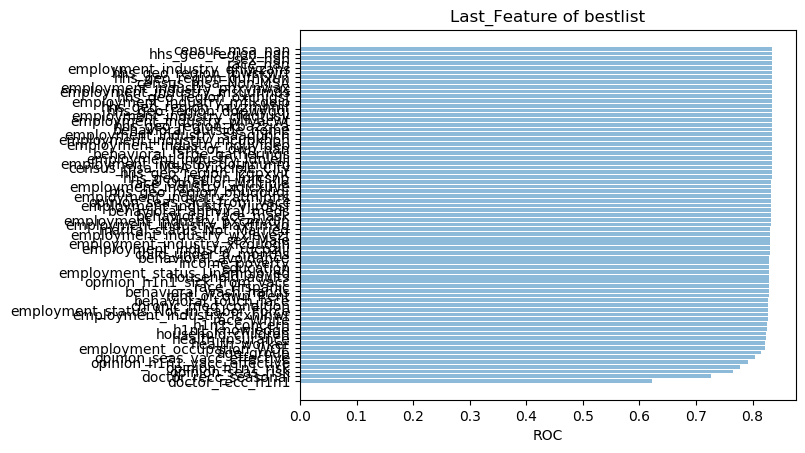

In [9]:
## 3 plot results of loop

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ROC_Features_LogReg['last_feature']
y_pos = np.arange(len(ROC_Features_LogReg['last_feature']))
performance = ROC_Features_LogReg['ROC']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('ROC')
plt.title('Last_Feature of bestlist')

plt.show()